In [392]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("✅ Libraries importées avec succès.")

✅ Libraries importées avec succès.


In [393]:
# Chargement du dataset
df=pd.read_csv('../data/animes.csv')
print("✅ Dataset chargé avec succès.")

# Affichage des 5 premières lignes du dataset pour regarde la structure des données
df.head(5)

✅ Dataset chargé avec succès.


,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é..."
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo..."
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.


## 1. Data Cleaning & Inspection

In [394]:
# Afficher le type de données et le nombre de valeurs nulles

# J'ai cherché sur internet une commande qui regroupe df.info et df.isnull().sum() en une seule commande
df.dtypes.to_frame('Type').join(df.isnull().sum().to_frame('Nulls'))

,Type,Nulls
Anime,str,0
Genre_Tags,str,0
Source,str,0
Nb_Episodes,int64,0
Status,str,0
Studio,str,0
Date_Pub,str,0
Note_Globale,float64,0
Note_Meilleur_Ep,float64,0
Meilleur_Ep_Titre,str,0


In [395]:
# == 1er clean après Audit ==

# Conversion de la colonne 'Date_Pub' en type datetime
df['Date_Pub']=pd.to_datetime(df['Date_Pub'], errors='coerce')
# Remplace les valeurs manquante de Comm_saison_3 par 'Non concerné.'
df['Comm_Saison_3']=df['Comm_Saison_3'].fillna('Non concerné.')

print("Nouvelle Audit après nettoyage :")
print(df.dtypes.to_frame('Type').join(df.isnull().sum().to_frame('Nulls')))
print('-' * 40)
print("✅ 1er Nettoyage des données terminé.")

Nouvelle Audit après nettoyage :
                             Type  Nulls
Anime                         str      0
Genre_Tags                    str      0
Source                        str      0
Nb_Episodes                 int64      0
Status                        str      0
Studio                        str      0
Date_Pub           datetime64[us]      0
Note_Globale              float64      0
Note_Meilleur_Ep          float64      0
Meilleur_Ep_Titre             str      0
Comm_Meilleur_Ep              str      0
Note_Pire_Ep              float64      0
Pire_Ep_Titre                 str      0
Comm_Pire_Ep                  str      0
Comm_Saison_1                 str      0
Comm_Saison_2                 str      0
Comm_Saison_3                 str      0
----------------------------------------
✅ 1er Nettoyage des données terminé.


In [396]:
# Vérification et suppression des doublons
doublons=df.duplicated().sum()
print(f"Nombre de doublons dans le dataset : {doublons}")

if doublons > 0:
    df=df.drop_duplicates()
    print("✅ Doublons supprimés.")
else:
    print("✅ Aucun doublon trouvé.")
    print("-" * 76)

df.describe()




Nombre de doublons dans le dataset : 2
✅ Doublons supprimés.


,Nb_Episodes,Date_Pub,Note_Globale,Note_Meilleur_Ep,Note_Pire_Ep
count,59.000000,59,59.000000,59.000000,59.000000
mean,91.864407,2013-01-13 13:01:01.016949,8.323729,9.323729,6.703390
min,3.000000,1989-04-26 00:00:00,6.000000,8.200000,0.000000
25%,24.000000,2006-12-11 00:00:00,8.150000,9.100000,6.200000
50%,37.000000,2014-07-04 00:00:00,8.400000,9.400000,7.200000
75%,75.500000,2019-07-06 12:00:00,8.650000,9.700000,7.500000
max,1090.000000,2025-04-07 00:00:00,9.300000,9.900000,8.400000
std,164.602181,NaN,0.523693,0.456123,1.388123


In [397]:
# Affiche la ligne où la note est 0 (on utilise .T pour tranformer les lignes en colonnes etc.. = Affichage plus propre)
print(df[df['Note_Pire_Ep'] == 0].T)

# Filtrer les animes avec une note du pire épisode supérieure à 0
df = df[df['Note_Pire_Ep'] > 0]

print("-" * 69)
print(f"✅ Filtrage effectué : {len(df)} animes restants")
print(f"✅ Medalist supprimé : {'Medalist' not in df['Anime'].values}")

# Sauvegarde du dataset nettoyé
df.to_csv('../data/animes_cleaned.csv', index=False)
print("✅ Dataset nettoyé sauvegardé sous '../data/animes_cleaned.csv'")



                                                                  14
Anime                                                       Medalist
Genre_Tags                                    Sport / Figure Skating
Source                                                         Manga
Nb_Episodes                                                        3
Status                                                      En cours
Studio                                                          ENGI
Date_Pub                                         2025-01-05 00:00:00
Note_Globale                                                     8.0
Note_Meilleur_Ep                                                 8.2
Meilleur_Ep_Titre                               Ep 1: Coach et Élève
Comm_Meilleur_Ep   Début prometteur, la passion du patinage est b...
Note_Pire_Ep                                                     0.0
Pire_Ep_Titre                                          (Trop récent)
Comm_Pire_Ep              Pas asse

## 2. Feature Engineering

In [398]:
# === Création Score de régularité des notes d'épisodes ===

# Calcul de l'écart entre la meilleure et la pire note d'épisode
df['Ecart'] = df['Note_Meilleur_Ep'] - df['Note_Pire_Ep']
# Calcul du score de régularité
df['Score_Regularite'] = 10 - df['Ecart']

# J'ai perdu 30 minutes à faire un print joli donc merci d'apprécier :)
print("\n" + "="*84 + "\n" + "                       🏆 TOP 5 - Animes les plus réguliers" + "\n" + "="*84)
print(df[['Anime', 'Note_Meilleur_Ep', 'Note_Pire_Ep', 'Ecart', 'Score_Regularite']].sort_values(by='Score_Regularite', ascending=False).head().to_string(index=False))
print("=" * 84 + "\n")


                       🏆 TOP 5 - Animes les plus réguliers
                    Anime  Note_Meilleur_Ep  Note_Pire_Ep  Ecart  Score_Regularite
                 Claymore               8.4           7.6    0.8               9.2
Mashle: Magic and Muscles               8.4           7.5    0.9               9.1
             Chainsaw Man               8.7           7.7    1.0               9.0
       Zetsuen No Tempest               8.5           7.4    1.1               8.9
        Your Lie in April               9.5           8.4    1.1               8.9



In [399]:
# === Création du Score Éditorial ===

# Formule : 60% Note Globale + 40% Score de Régularité car une bonne note globale est importante mais la régularité l'est tout autant pour un bon anime
# Calcul du Score Éditorial
df['Score_Editorial'] = (0.6 * df['Note_Globale']) + (0.4 * df['Score_Regularite'])

print("\n" + "="*84 + "\n" + "                       🏆 TOP 5 - Score Éditorial (Le Verdict)" + "\n" + "="*84)
print(df[['Anime', 'Note_Globale', 'Score_Regularite', 'Score_Editorial']].sort_values(by='Score_Editorial', ascending=False).head(5).to_string(index=False))
print("=" * 84 + "\n")



                       🏆 TOP 5 - Score Éditorial (Le Verdict)
                        Anime  Note_Globale  Score_Regularite  Score_Editorial
Frieren: Beyond Journey's End           9.3               7.9             8.74
            Your Lie in April           8.6               8.9             8.72
                  Steins;Gate           9.1               8.1             8.70
                 Vinland Saga           8.8               8.5             8.68
                     Mushishi           8.7               8.6             8.66



## 3. Validation des Hypothèses

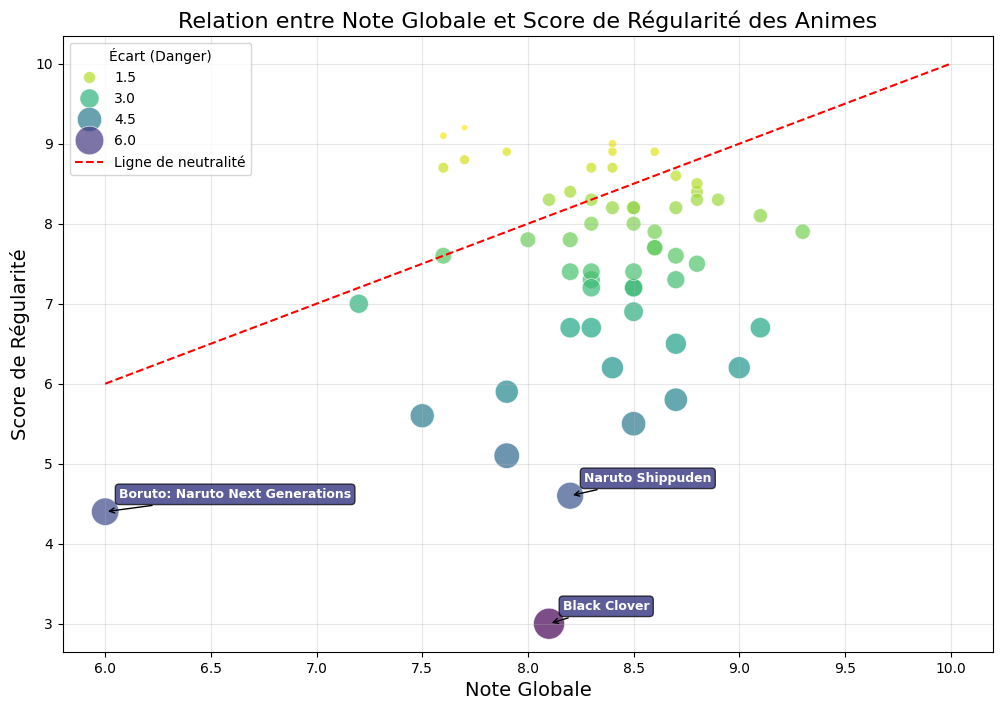

In [400]:
# === Graphique : Note Globale vs Score de Régularité 

plt.figure(figsize=(12, 8))

# Nuage de points
sns.scatterplot(data=df, x='Note_Globale', y='Score_Regularite', size='Ecart', hue='Ecart',sizes=(20, 500), palette='viridis_r', alpha=0.7)

# Traçage ligne de neutralité
plt.plot([6, 10], [6, 10], color='red', linestyle='--', label='Ligne de neutralité')

plt.title('Relation entre Note Globale et Score de Régularité des Animes', fontsize=16)
plt.xlabel('Note Globale', fontsize=14)
plt.ylabel('Score de Régularité', fontsize=14)
plt.legend(title='Écart (Danger)')
plt.grid(True, alpha=0.3)

# Annotation des 3 animes avec le plus grand écart
for i in range(3):
    worst_row = df.sort_values(by='Ecart', ascending=False).iloc[i]
    plt.annotate(worst_row['Anime'], 
                xy=(worst_row['Note_Globale'], worst_row['Score_Regularite']),
                xytext=(10, 10), textcoords='offset points',
                fontsize=9, weight='bold', color='white',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='#191970', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
plt.show()

In [401]:
# === Comparaison : Top 10 par Note Globale vs Top 10 par Score Éditorial ===

# Variabnle : Création des classements
top_classique = df.sort_values(by='Note_Globale', ascending=False).head(10)[['Anime', 'Note_Globale']]
top_editorial = df.sort_values(by='Score_Editorial', ascending=False).head(10)[['Anime', 'Score_Editorial']]

# Réinitialisation des index pour un affichage propre
top_classique = top_classique.reset_index(drop=True)
top_editorial = top_editorial.reset_index(drop=True)

# Rename des colonnes
top_classique.columns = ['Anime (Classique)', 'Note Globale']
top_editorial.columns = ['Anime (Éditorial)', 'Score Éditorial']

# Encore un print de goat
print("\n" + "="*100 + "\n" + "               📊 COMPARAISON : TOP 10 PAR NOTE GLOBALE vs TOP 10 PAR SCORE ÉDITORIAL" + "\n" + "="*100)
print(pd.concat([top_classique, top_editorial], axis=1).to_string(index=True))
print("=" * 100)


               📊 COMPARAISON : TOP 10 PAR NOTE GLOBALE vs TOP 10 PAR SCORE ÉDITORIAL
                  Anime (Classique)  Note Globale              Anime (Éditorial)  Score Éditorial
0     Frieren: Beyond Journey's End           9.3  Frieren: Beyond Journey's End             8.74
1  Fullmetal Alchemist: Brotherhood           9.1              Your Lie in April             8.72
2                       Steins;Gate           9.1                    Steins;Gate             8.70
3            Hunter x Hunter (2011)           9.0                   Vinland Saga             8.68
4                           Monster           8.9                       Mushishi             8.66
5      Les Carnets de l'apothicaire           8.8                        Monster             8.66
6                    Hajime no Ippo           8.8                   Chainsaw Man             8.64
7                      Vinland Saga           8.8   Les Carnets de l'apothicaire             8.64
8                      Cowboy Be

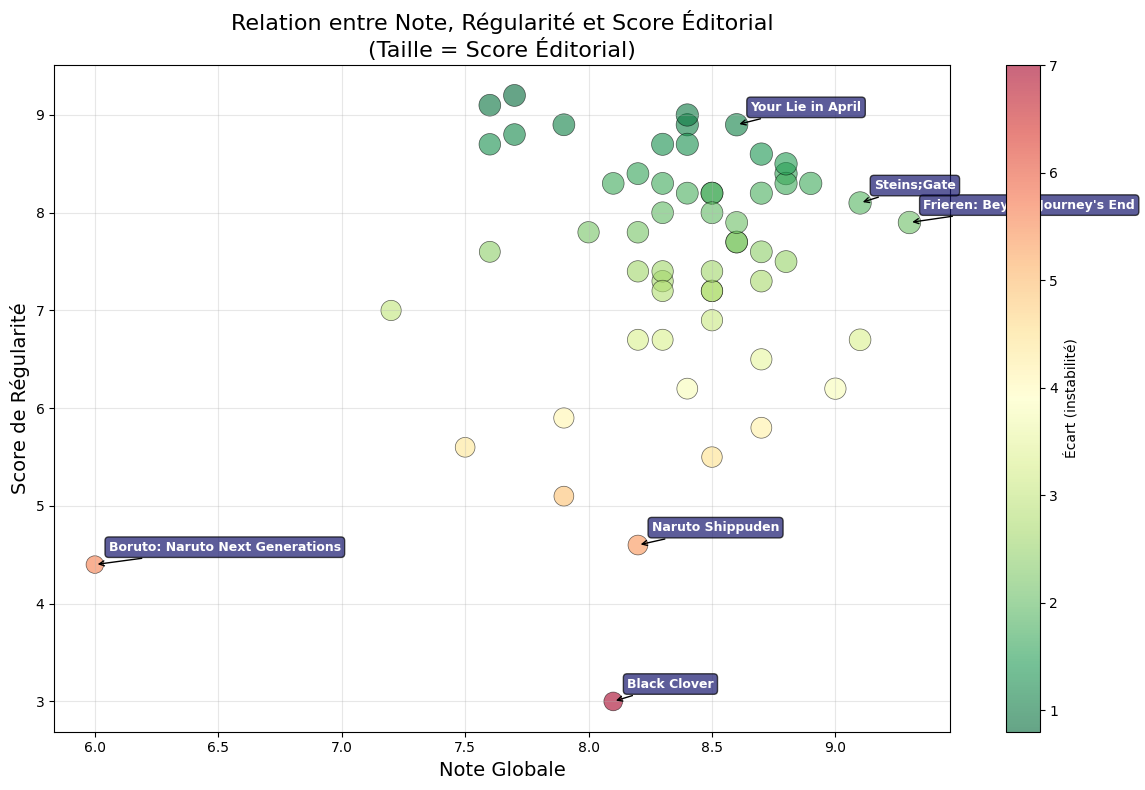

Corrélation entre Note Globale et Score de Régularité : 0.23


In [402]:
# === Affichage bonus (Bubble 3D) : Note Globale vs Score de Régularité avec Score Éditorial ===

plt.figure(figsize=(12, 8))

# Utiliser le nombre d'épisodes comme taille des bulles (si disponible)
scatter = plt.scatter(df['Note_Globale'], df['Score_Regularite'], 
                     s=df['Score_Editorial']*30,
                     c=df['Ecart'], cmap='RdYlGn_r', 
                     alpha=0.6, edgecolors='black', linewidth=0.5)

plt.colorbar(scatter, label='Écart (instabilité)')
plt.xlabel('Note Globale', fontsize=14)
plt.ylabel('Score de Régularité', fontsize=14)
plt.title('Relation entre Note, Régularité et Score Éditorial\n(Taille = Score Éditorial)', fontsize=16)
plt.grid(True, alpha=0.3)

# Annotations pour les meilleurs
top3 = df.nlargest(3, 'Score_Editorial')
for _, row in top3.iterrows():
    plt.annotate(row['Anime'], 
                xy=(row['Note_Globale'], row['Score_Regularite']),
                xytext=(10, 10), textcoords='offset points',
                fontsize=9, weight='bold', color='white',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='#191970', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
# Annotations pour les pires (plus grand écart)
for i in range(3):
    worst_row = df.sort_values(by='Ecart', ascending=False).iloc[i]
    plt.annotate(worst_row['Anime'], 
                xy=(worst_row['Note_Globale'], worst_row['Score_Regularite']),
                xytext=(10, 10), textcoords='offset points',
                fontsize=9, weight='bold', color='white',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='#191970', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))


plt.tight_layout()
plt.show()

# Calcul de la corrélation entre Note Globale et Score de Régularité
corr = df['Note_Globale'].corr(df['Score_Regularite'])
print(f"Corrélation entre Note Globale et Score de Régularité : {corr:.2f}")

## 4. Segmentation Éditoriale

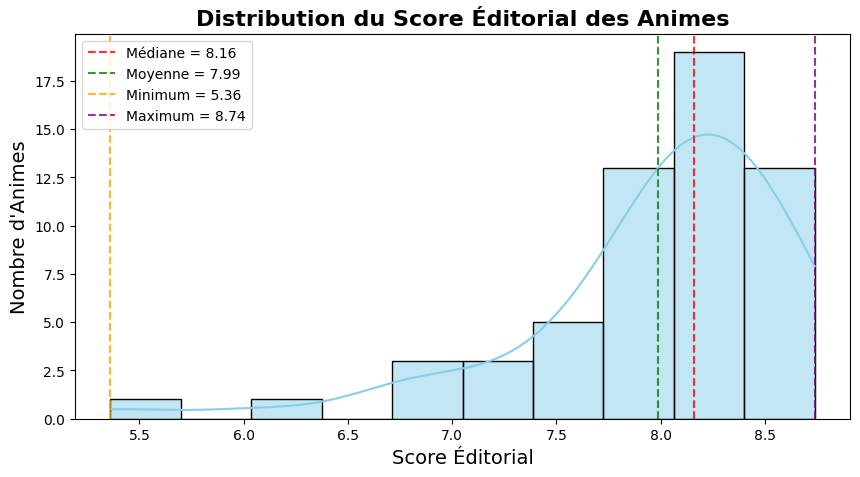


📊 Médiane: 8.16 | Moyenne: 7.99 | Minimum: 5.36 | Maximum: 8.74



In [403]:
# === Distribution du Score Éditorial ===

# Calcul des statistiques
mediane = df['Score_Editorial'].median()
moyenne = df['Score_Editorial'].mean()
minimum = df['Score_Editorial'].min()
maximum = df['Score_Editorial'].max()

plt.figure(figsize=(10, 5))
sns.histplot(df['Score_Editorial'], bins=10, kde=True, color='skyblue')

# Ligne de médiane
plt.axvline(mediane, color='red', linestyle='--', linewidth=1.5, label=f'Médiane = {mediane:.2f}', alpha=0.8)
# Ligne de moyenne
plt.axvline(moyenne, color='green', linestyle='--', linewidth=1.5, label=f'Moyenne = {moyenne:.2f}', alpha=0.8)
# Ligne minimum
plt.axvline(minimum, color='orange', linestyle='--', linewidth=1.5, label=f'Minimum = {minimum:.2f}', alpha=0.8)
# Ligne maximum
plt.axvline(maximum, color='purple', linestyle='--', linewidth=1.5, label=f'Maximum = {maximum:.2f}', alpha=0.8)

plt.legend(fontsize=10, loc='upper left')

plt.title('Distribution du Score Éditorial des Animes', fontsize=16, weight='bold')
plt.xlabel('Score Éditorial', fontsize=14)
plt.ylabel('Nombre d\'Animes', fontsize=14)
plt.show()

print(f"\n📊 Médiane: {mediane:.2f} | Moyenne: {moyenne:.2f} | Minimum: {minimum:.2f} | Maximum: {maximum:.2f}\n")



In [404]:
# === Répartition par catégorie éditoriale ===

# Définition des labels basés sur le Score Éditorial
def definir_label(score):
    if score >= 8.5:
        return "💎 Chef-d'œuvre"
    elif score >= 8.0:
        return "✅ Très bon"
    elif score >= 7.0:
        return "⚠️ Bon mais risqué"
    else:
        return "❌ À éviter"

# Application des labels au score éditorial
df['Label_Editorial'] = df['Score_Editorial'].apply(definir_label)

# Définition de l'ordre des catégories
ordre_categories = ["💎 Chef-d'œuvre", "✅ Très bon", "⚠️ Bon mais risqué", "❌ À éviter"]
counts = df['Label_Editorial'].value_counts()
counts_ordonne = counts.reindex(ordre_categories, fill_value=0)

# Affichage des résultats (j'ai encore galéré à faire un print joli donc enjoy :) )
print("\n" + "="*60)
print("          📊 RÉPARTITION PAR CATÉGORIE ÉDITORIALE")
print("="*60)
for label, count in counts_ordonne.items(): print(f"{label:<47} {count:>3} animes")
print("-"*60 + "\n")


          📊 RÉPARTITION PAR CATÉGORIE ÉDITORIALE
💎 Chef-d'œuvre                                   12 animes
✅ Très bon                                       23 animes
⚠️ Bon mais risqué                               18 animes
❌ À éviter                                        5 animes
------------------------------------------------------------



## 5. Système de Recommandation

In [424]:
# === Fonction de Recomandation Intelligente ===

def recommander_animes(titre_source):
    if titre_source not in df['Anime'].values:
        return f"❌ Désolé, l'anime '{titre_source}' n'est pas dans ma base de données."
    # Récupérer les informations de l'anime source
    anime_info = df[df['Anime'] == titre_source].iloc[0]
    genre_source = anime_info['Genre_Tags']
    # Extraire le genre principal pour la recommandation
    genre_principal = genre_source.split(' / ')[0]  # Prendre le premier genre comme principal
    # Filtrage des animes du même genre, score élevé et différent de l'anime source
    recommandations = df[(df['Genre_Tags'].str.contains(genre_principal)) &
                         (df['Anime'] != titre_source) &
                         (df['Score_Editorial'] >= 7.0)
                        ].sort_values(by='Score_Editorial', ascending=False)
    if recommandations.empty:
        return f"❌ Désolé, aucune recommandation trouvée pour le genre '{genre_principal}'."
    
    # Configuration pandas pour un affichage complet du tableau
    pd.set_option('display.max_colwidth', None) 
    pd.set_option('display.width', None)
    pd.set_option('display.max_columns', None)

    print("\n" + "="*100)
    print(f"                        🎬 RECOMMANDATIONS : {titre_source} → Genre '{genre_principal}'")
    print("="*100)
    # Affichage des recommandations
    result = recommandations[['Anime', 'Genre_Tags', 'Score_Editorial', 'Label_Editorial']].reset_index(drop=True)
    result.index = result.index + 1
    
    print(result.to_string())
    print("="*100 + "\n")
    return "✅ Recommandations affichées ci-dessus."

print(recommander_animes('One Piece'))


                        🎬 RECOMMANDATIONS : One Piece → Genre 'Adventure'
                           Anime            Genre_Tags  Score_Editorial     Label_Editorial
1  Frieren: Beyond Journey's End   Adventure / Fantasy             8.74      💎 Chef-d'œuvre
2                   Vinland Saga     Adventure / Drama             8.68      💎 Chef-d'œuvre
3               Samurai Champloo  Adventure / Chanbara             8.38          ✅ Très bon
4                  Made in Abyss   Adventure / Mystery             8.32          ✅ Très bon
5                      Dr. Stone    Sci-Fi / Adventure             8.18          ✅ Très bon
6         Hunter x Hunter (2011)    Adventure / Shonen             7.88  ⚠️ Bon mais risqué
7                     Fairy Tail     Adventure / Magic             7.60  ⚠️ Bon mais risqué

✅ Recommandations affichées ci-dessus.
